In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 3


In [3]:
texts = os.listdir('./datasample')
texts

['111.txt', '222.txt', '333.txt']

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','昂坪 360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','天際 100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','恆香老婆餅','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','the one百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊','詳細','香港','paula'])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yj/b2sj8k396ts1dld08589ctwc0000gn/T/jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built succesfully.


In [6]:
stopwords = ['的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊','往','狠','一日','大多','短短','回顧','完善','之旅','幾家','路程','這樣','硬性','詳細','超','香港','paula'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [11]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻

[('纜車', 16),
 ('.', 10),
 ('迪士尼樂園', 10),
 ('美食', 9),
 ('昂坪360', 9),
 ('張保仔號', 7),
 ('電影', 7),
 ('海洋公園', 6),
 ('太平山頂', 6),
 ('大嶼山', 6),
 ('套票', 5),
 ('遊', 5),
 ('維多利亞港', 5),
 ('電子', 4),
 ('搭乘', 4),
 ('夜遊', 4),
 ('杜莎夫人蠟像館', 4),
 ('人', 4),
 ('燈光秀', 4),
 ('來', 4)]

In [8]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [9]:
corpus_cut = [jieba.lcut(t) for t in corpus]
# 查詢斷完詞後的 list 
corpus_cut

[['香港',
  '旅遊景點',
  '有',
  '哪些',
  '香港',
  '去',
  '哪',
  '玩',
  '40',
  '大',
  '香港',
  '景點',
  '推薦',
  '香港',
  '景點',
  '地圖',
  '攻略',
  '有',
  '答案',
  '這些',
  '超人氣',
  '香港',
  '必去',
  '景點',
  '是',
  '波比',
  '根據',
  '香港旅遊發展局',
  '景點',
  '排名',
  '網路',
  '熱搜',
  '程度',
  '以及',
  '諸多',
  '香港',
  '自由行',
  '分享文',
  '精選',
  '出來',
  '的',
  '超人氣',
  '景點',
  '所有',
  '的',
  '香港',
  '景點',
  '都',
  '會',
  '附上',
  '香港',
  '地鐵資訊',
  '香港',
  '地圖',
  '優惠',
  '票券',
  '方便',
  '大家',
  '安排',
  '香港',
  '旅遊',
  '行程',
  '比價',
  '搶',
  '便宜',
  '門票',
  '趕緊',
  '拿',
  '著',
  '這份',
  '香港',
  '旅遊',
  '地圖',
  '大',
  '彙整',
  '含',
  '香港',
  '私房',
  '景點',
  '一起',
  '玩',
  '瘋制',
  '霸',
  '香港',
  '吧',
  '2019',
  '更新',
  '香港',
  '住宿',
  '懶人包',
  '香港',
  '超熱門',
  'Top',
  '15',
  '住宿',
  '總',
  '整理',
  '香港',
  '超',
  '詳細',
  '攻略',
  '行程',
  '自由行',
  '規劃',
  '大補帖',
  '機票',
  '最',
  '便宜',
  '機票',
  '5000',
  '元有',
  '找景點',
  '精選',
  '10',
  '大遊客',
  '必去',
  '景點',
  '必買',
  '28',
  '項超',
  '夯伴',
  '手禮',
  '大公',
  '開',
  '美食',

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [10]:
##a = [[1, 2], [3, 4]] 大概是這概念
#cut = [i for sublist in corpus_cut for i in sublist]
#new_dic = []
#for i in range(len(cut) - 1):
#    assemble_word = cut[i]+cut[i+1]
#    new_dic.append(assemble_word)
#    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

香港旅遊景點
旅遊景點有
有哪些
哪些香港
香港去
去哪
哪玩
玩40
40大
大香港
香港景點
景點推薦
推薦香港
香港景點
景點地圖
地圖攻略
攻略有
有答案
答案這些
這些超人氣
超人氣香港
香港必去
必去景點
景點是
是波比
波比根據
根據香港旅遊發展局
香港旅遊發展局景點
景點排名
排名網路
網路熱搜
熱搜程度
程度以及
以及諸多
諸多香港
香港自由行
自由行分享文
分享文精選
精選出來
出來的
的超人氣
超人氣景點
景點所有
所有的
的香港
香港景點
景點都
都會
會附上
附上香港
香港地鐵資訊
地鐵資訊香港
香港地圖
地圖優惠
優惠票券
票券方便
方便大家
大家安排
安排香港
香港旅遊
旅遊行程
行程比價
比價搶
搶便宜
便宜門票
門票趕緊
趕緊拿
拿著
著這份
這份香港
香港旅遊
旅遊地圖
地圖大
大彙整
彙整含
含香港
香港私房
私房景點
景點一起
一起玩
玩瘋制
瘋制霸
霸香港
香港吧
吧2019
2019更新
更新香港
香港住宿
住宿懶人包
懶人包香港
香港超熱門
超熱門Top
Top15
15住宿
住宿總
總整理
整理香港
香港超
超詳細
詳細攻略
攻略行程
行程自由行
自由行規劃
規劃大補帖
大補帖機票
機票最
最便宜
便宜機票
機票5000
5000元有
元有找景點
找景點精選
精選10
10大遊客
大遊客必去
必去景點
景點必買
必買28
28項超
項超夯伴
夯伴手禮
手禮大公
大公開
開美食
美食53
53家
家香港
香港人氣
人氣餐廳
餐廳一次
一次打包
打包香港
香港省錢
省錢票券
票券比官網
比官網更
更便宜
便宜1
1.
.迪士尼樂園
迪士尼樂園電子
電子門票
門票2
2.
.海洋公園
海洋公園電子
電子門票
門票3
3.
.太平山頂
太平山頂纜車
纜車快速通關
快速通關套票
套票4
4.
.昂坪360
昂坪360纜車
纜車大嶼山
大嶼山深度
深度遊
遊5
5.
.搭乘
搭乘帆船
帆船張保仔號
張保仔號夜遊
夜遊維多利亞港
維多利亞港249
249個
個更
更多
多香港
香港便宜
便宜行程
行程票券
票券香港
香港景點
景點地圖
地圖香港
香港自由行
自由行景點
景點總覽
總覽地圖
地圖原檔
原檔免費
免費索取
索取最
最重要
重要的
的香港
香港景點
景點通通
通通放進
放進這張
這張地
地圖裡
圖裡了
了共
共40
40處

香港菜
菜單用語
單用語讓
讓你
你們
們一篇
一篇搞定
搞定所有
所有重點
重點美食
美食狂熱者
狂熱者絕對
絕對不能
不能錯過
錯過香港
香港美食
美食沒
沒吃
吃超後悔
超後悔2019
2019香港
香港必吃
必吃美食
美食地圖
地圖香港
香港米其林
米其林清單
清單No.7
No.7香港
香港旅遊
旅遊必買伴
必買伴手禮
手禮香港
香港太好
太好買
買了
了來
來香港
香港購物
購物帶
帶一個
一個行李箱
行李箱專程
專程掃貨
掃貨都
都不是
不是問題
問題除了
除了大家
大家耳熟
耳熟能詳
能詳的
的珍妮
珍妮曲奇
曲奇小熊
小熊餅乾德
餅乾德成號
成號蛋
蛋捲
捲檸檬王
檸檬王陳
陳意齋
意齋杏仁
杏仁餅帝苑
餅帝苑蝴蝶
蝴蝶酥恆香
酥恆香老婆
老婆餅外
餅外波比
波比還
還收集
收集了
了只有
只有香港
香港在
在地
地人才
人才懂
懂的
的隱藏版伴
隱藏版伴手禮
手禮像是
像是嘉頓
嘉頓麥芽
麥芽酥
酥餅壽桃牌
餅壽桃牌蝦子
蝦子麵
麵珍珍
珍珍牛仔
牛仔片丹麥
片丹麥藍罐
藍罐曲奇
曲奇等
等也
也不容
不容錯過
錯過和
和我
我一樣
一樣愛血
愛血拚
拚的
的人
人快點
快點看
看下面
下面文章
文章一網
一網打
打盡
盡香港
香港超夯
超夯好物
好物香港
香港必買伴
必買伴手禮
手禮28
28個
個超市
超市必買
必買零食
零食藥妝
藥妝香港
香港人
人與
與遊客
遊客推薦
推薦大公
大公開
開No.8
No.8香港
香港自由行
自由行交通
交通攻略
攻略香港
香港交通
交通四通
四通八達
八達大部分
大部分景點
景點與
與美食
美食都
都可靠
可靠大眾
大眾運輸
運輸抵達
抵達香港
香港自由行
自由行常用
常用到
到的
的交通
交通方式
方式有
有1
1.
.機場
機場快線
快線香港
香港機場
機場到
到市區
市區從
從機場
機場到
到九龍
九龍或
或中環
中環僅需
僅需20
20幾分鐘
幾分鐘波比
波比建議
建議在
在台灣
台灣先
先買
買好
好64
64折車票
折車票最
最划算
划算抵達
抵達市區
市區後
後可
可再
再轉搭免
轉搭免費機場
費機場快線
快線巴士
巴士前往
前往各大飯
各大飯店
店還有
還有超
超方便
方便的
的市區
市區預辦
預辦登機
登機服務
服務詳細
詳細文章
文章香港
香港機場
機場快線
快線到
到市區
市區獨享


到香港
香港只
只跳
跳一個島
一個島怎麼夠
怎麼夠勒
勒第
第3
3天
天paula
paula選了
選了一個
一個不同
不同風情
風情的
的愉景灣
愉景灣擁有
擁有浪漫
浪漫海灣
海灣的
的愉景灣
愉景灣很
很適合
適合情人
情人一起
一起來
來是
是嫌棄
嫌棄閨蜜
閨蜜就
就對
對了
了...
...如果
如果吳老
吳老闆
闆同意
同意paula
paula還真想
還真想再遊
再遊愉景灣
愉景灣離開
離開愉景灣
愉景灣我們
我們還到
還到港鐵西
港鐵西環站
環站西環
西環站裡
站裡就
就有
有很
很不錯
不錯的
的拍照
拍照地點
地點喔
喔立體
立體壁畫
壁畫然後我們
然後我們才
才享用
享用午餐
午餐周記
周記點心
點心茶餐
茶餐廳終
廳終於
於知道
知道paula
paula心心念念
心心念念的
的奶皇
奶皇流沙
流沙西多士
西多士吃
吃飽
飽飽
飽一定
一定要
要運動
運動的
的阿
阿尤其
尤其是
是吃
吃完
完那個
那個邪
邪惡
惡的
的高熱量
高熱量食物
食物閨蜜
閨蜜表示
表示高熱量
高熱量食物
食物只有
只有你
你吃
吃西
西環泳棚
環泳棚是
是香港
香港碩果
碩果僅存
僅存的
的古
古早泳棚
早泳棚小橋
小橋連接
連接著海
著海海天
海天一線
一線是
是很
很夯
夯的
的拍照
拍照打卡
打卡景點
景點只是
只是現在
現在遊客
遊客很多
很多要
要拍照
拍照可能
可能要
要多
多預留
預留一些
一些時間
時間而
而paula
paula一行
一行人
人因為
因為時間
時間的關
的關係
係就
就沒
沒有
有多
多停留
停留了
了僅是
僅是拍拍
拍拍照記錄
照記錄一下
一下自己
自己的
的瘋狂
瘋狂到
到每個
每個國家
國家一定
一定要
要逛
逛的
的是
是超市
超市宜必思
宜必思香港
香港中
中上環
上環酒店
酒店附近
附近就
就有
有好
好幾家
幾家超市
超市當然
當然要
要瞎逛
瞎逛囉
囉而
而paula
paula最愛的
最愛的就是
就是啤酒
啤酒區了
區了香港
香港的
的啤酒
啤酒不算
不算貴
貴喔
喔零食
零食也
也是
是一定
一定要
要逛
逛的
的而
而閨蜜們
閨蜜們還買
還買了
了一堆
一堆出前
出前一丁
一丁跟
跟鴛鴦
鴛鴦奶茶
奶茶這些
這些都
都是
是可以
可以送禮
送禮自用
自用兩
兩相宜
相宜的
的喔
喔而
而paula
p

In [11]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)

In [12]:
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

[('paula', 16),
 ('很', 15),
 ('要', 15),
 ('中', 13),
 ('時間', 12),
 ('喔', 11),
 ('上環', 10),
 ('囉', 9),
 ('由此', 8),
 ('可以', 7),
 ('閨蜜', 6),
 ('壁畫', 6),
 ('下', 6),
 ('愉景灣', 6),
 ('酒店', 6),
 ('說', 6),
 ('來', 6),
 ('旅行', 5),
 ('跳島', 5),
 ('宜必思', 5),
 ('當然', 5),
 ('進', 5),
 ('吃', 5),
 ('之', 4),
 ('機場', 4),
 ('晚餐', 4),
 ('半日', 4),
 ('鵝頸橋', 4),
 ('避風塘', 4),
 ('好', 4),
 ('只', 4),
 ('沒', 4),
 ('跟', 4),
 ('這個', 4),
 ('就是', 4),
 ('對', 4),
 ('搭', 4),
 ('三天', 3),
 ('兩夜', 3),
 ('午餐', 3),
 ('大館', 3),
 ('名館', 3),
 ('大澳', 3),
 ('打', 3),
 ('小人', 3),
 ('信記', 3),
 ('海鮮', 3),
 ('港鐵西', 3),
 ('環泳棚', 3),
 ('電子', 3),
 ('閨蜜們', 3),
 ('真的', 3),
 ('沒有', 3),
 ('checkin', 3),
 ('應該', 3),
 ('累', 3),
 ('有點', 3),
 ('所以', 3),
 ('逛', 3),
 ('印象', 3),
 ('阿', 3),
 ('已經', 3),
 ('其實', 3),
 ('走', 3),
 ('公車', 3),
 ('你', 3),
 ('Ibis', 3),
 ('天', 3),
 ('才', 3),
 ('附近', 3),
 ('體驗', 3),
 ('特別', 3),
 ('拍照', 3),
 ('愛', 2),
 ('放', 2),
 ('鬆', 2),
 ('day1', 2),
 ('搭乘', 2),
 ('航空', 2),
 ('底累', 2),
 ('MingBistro', 2),
 ('day2', 2),
 ('伴手', 

In [14]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [15]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,海洋公園門票,油麻地規模,日,類似悠遊卡,再造訪,但是,過這次paula,照記錄一下,了好久,點這裡曾經,...,分攤1,事項應先,王者封號,無天無,新的,耳熟能詳,夜景杜莎夫人蠟像館,價格低廉,注意,小費退稅
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,海洋公園門票,油麻地規模,日,類似悠遊卡,再造訪,但是,過這次paula,照記錄一下,了好久,點這裡曾經,...,分攤1,事項應先,王者封號,無天無,新的,耳熟能詳,夜景杜莎夫人蠟像館,價格低廉,注意,小費退稅
0,0.026069,0.026069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.026069,0.000000,0.000000,0.026069,0.026069,0.000000,0.000000
1,0.000000,0.000000,0.049417,0.024708,0.024708,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024708,0.000000,0.024708,0.000000,0.000000,0.024708,0.000000,0.000000,0.000000,0.024708
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.058109,0.029055,0.029055,0.029055,0.029055,...,0.000000,0.029055,0.000000,0.000000,0.029055,0.000000,0.000000,0.000000,0.029055,0.000000


In [17]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('海洋公園門票', 1.0),
 ('油麻地規模', 1.0),
 ('日', 0.0),
 ('類似悠遊卡', 0.0),
 ('再造訪', 0.0),
 ('但是', 0.0),
 ('過這次paula', 0.0),
 ('照記錄一下', 0.0),
 ('了好久', 0.0),
 ('點這裡曾經', 0.0)]

OSError: cannot open resource

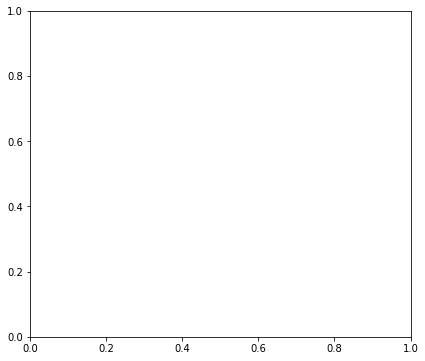

In [18]:
linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)



OSError: cannot open resource

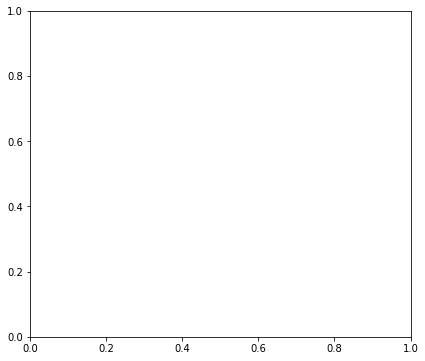

In [19]:
#修正過後
plt.figure(figsize=(15, 6))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=450, width=450)

In [63]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x113ddb8c8> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'

<Figure size 2520x288 with 1 Axes>

In [64]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x113ddb8c8> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'

<Figure size 2520x288 with 1 Axes>